# Performace plots

In [11]:
import wandb
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import csv
from scipy.stats import sem



### sharefood

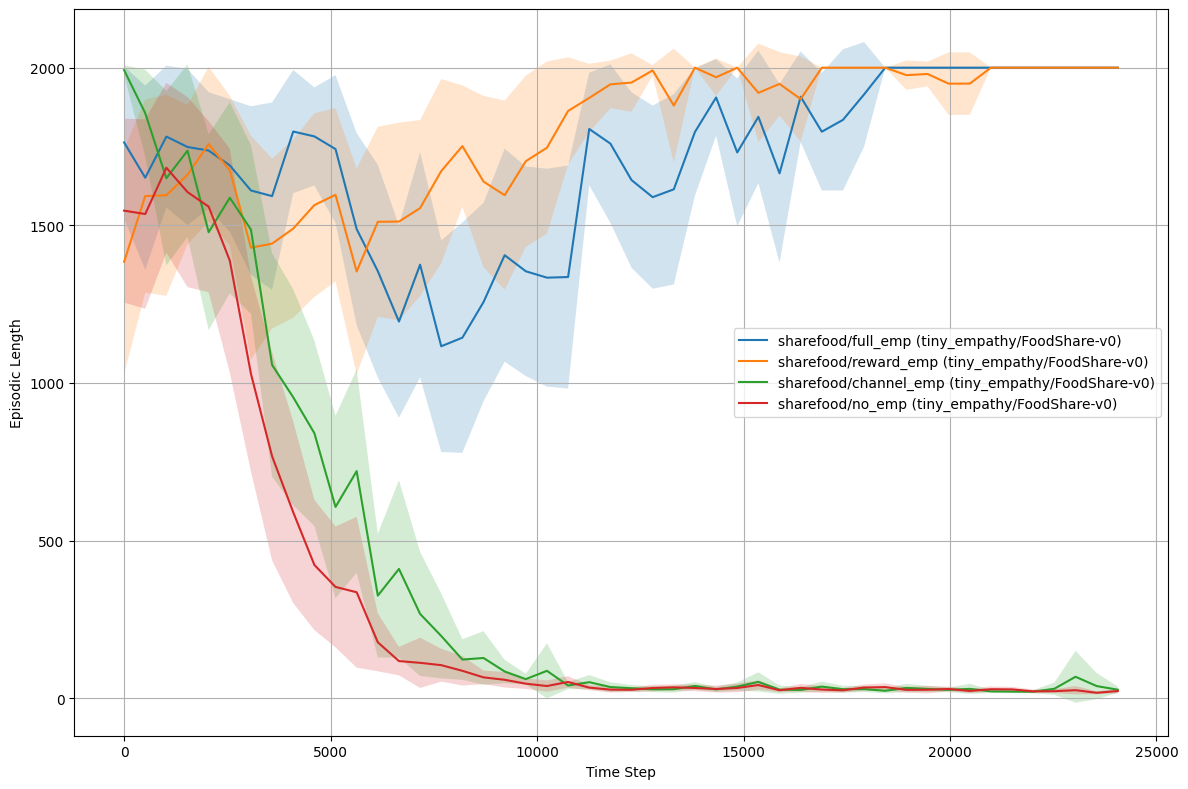

In [29]:
# Wandb APIの初期化
api = wandb.Api()
entity = "ugo-nama-kun"       # 例: "ugo-nama-kun"
project = "empathy_hrl"     # ワークスペース内のプロジェクト名

env_id = "tiny_empathy/FoodShare-v0"
targets = [
    {"wandb_group_name": "sharefood/full_emp"},
    {"wandb_group_name": "sharefood/reward_emp"},
    {"wandb_group_name": "sharefood/channel_emp"},
    {"wandb_group_name": "sharefood/no_emp"},
]

# ---------------------------
# 補助関数
# ---------------------------
def get_runs_for_group_env(runs, group, env_id_):
    return [
        run for run in runs
        if run.config.get("wandb_group_name") == group and run.config.get("env_id") == env_id_
    ]

def compute_curve_with_ci(runs, key_x="global_step", key_y="test/episodic_length"):
    all_data = []
    for run in runs:
        df = run.history(keys=[key_x, key_y], pandas=True)
        df["run_id"] = run.id
        all_data.append(df)
    df_all = pd.concat(all_data, ignore_index=True)
    df_all = df_all.dropna(subset=[key_x, key_y])
    grouped = df_all.groupby(key_x)[key_y]
    mean = grouped.mean()
    ci = 1.96 * grouped.apply(sem)
    return mean.index, mean.values, ci.values

# ---------------------------
# プロット処理
# ---------------------------
runs = api.runs(f"{entity}/{project}")

plt.figure(figsize=(12, 8))

for target in targets:
    group = target["wandb_group_name"]
    target_runs = get_runs_for_group_env(runs, group, env_id)
    
    if not target_runs:
        print(f"[!] No runs found for group: {group}, env_id: {env_id}")
        continue

    x, y, ci = compute_curve_with_ci(target_runs)
    x = x
    label = f"{group} ({env_id})"
    plt.plot(x, y, label=label)
    plt.fill_between(x, y - ci, y + ci, alpha=0.2)

plt.xlabel("Time Step")
plt.ylabel("Episodic Length")
# plt.title("Learning Curves with 95% Confidence Interval")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("plots_alife2025/foodshare.pdf")
plt.show()

### grid rooms

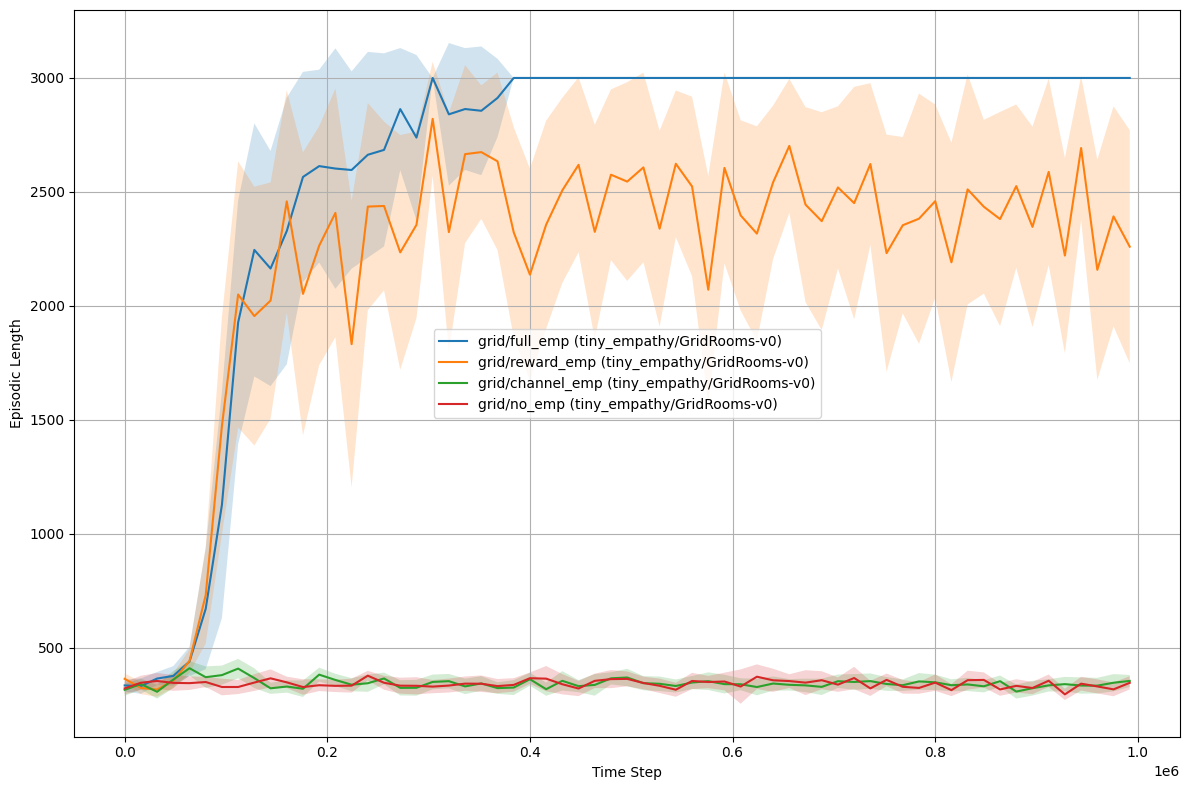

In [2]:
# Wandb APIの初期化
api = wandb.Api()
entity = "ugo-nama-kun"       # 例: "ugo-nama-kun"
project = "empathy_hrl"     # ワークスペース内のプロジェクト名

env_id = "tiny_empathy/GridRooms-v0"
targets = [
    {"wandb_group_name": "grid/full_emp"},
    {"wandb_group_name": "grid/reward_emp"},
    {"wandb_group_name": "grid/channel_emp"},
    {"wandb_group_name": "grid/no_emp"},
]

# ---------------------------
# 補助関数
# ---------------------------
def get_runs_for_group_env(runs, group, env_id_):
    return [
        run for run in runs
        if run.config.get("wandb_group_name") == group and run.config.get("env_id") == env_id_
    ]

def compute_curve_with_ci(runs, key_x="global_step", key_y="test/episodic_length"):
    all_data = []
    for run in runs:
        df = run.history(keys=[key_x, key_y], pandas=True)
        df["run_id"] = run.id
        all_data.append(df)
    df_all = pd.concat(all_data, ignore_index=True)
    df_all = df_all.dropna(subset=[key_x, key_y])
    grouped = df_all.groupby(key_x)[key_y]
    mean = grouped.mean()
    ci = 1.96 * grouped.apply(sem)
    return mean.index, mean.values, ci.values

# ---------------------------
# プロット処理
# ---------------------------
runs = api.runs(f"{entity}/{project}")

plt.figure(figsize=(12, 8))

for target in targets:
    group = target["wandb_group_name"]
    target_runs = get_runs_for_group_env(runs, group, env_id)
    
    if not target_runs:
        print(f"[!] No runs found for group: {group}, env_id: {env_id}")
        continue

    x, y, ci = compute_curve_with_ci(target_runs)
    x = x[::10]
    y = y[::10]
    ci = ci[::10]
    label = f"{group} ({env_id})"
    plt.plot(x, y, label=label)
    plt.fill_between(x, y - ci, y + ci, alpha=0.2)

plt.xlabel("Time Step")
plt.ylabel("Episodic Length")
# plt.title("Learning Curves with 95% Confidence Interval")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("plots_alife2025/grid_rooms.pdf")
plt.show()

### trap

e0kmrh03
qxluqkuj
vqaaskf3
a9djcpdw
8vzs2m62
sw3mmck9
vbay4smv
jqn357hl
og30auzd
9qrrt1k3
njp38svs
r8nnyv5p
73ufyyl0
rvq46njd
w4hckzlw
bb7ue4np
ir0hi6o5
kw1p1v2p
skvaj638
3d7jj7ja
(500, 20)
20
l93g7pap
5qzmwaaq
bfmstpyr
hco0kh15
2rslxd6h
0mtwak57
1al5kg5i
b0690mp8
hlfzqmkk
4j40r7uy
g9f29ch4
k1f5rrfw
u6skmeh6
n03gmrk6
glt9tez9
dg3dyomf
eydle82u
00og2pyp
dm5bx9m0
02nyjzr6
(500, 20)
20
v68su5ey
ak1h3zmb
j7oju9ve
mhdk5faa
f9hlfoyc
vwip4nvo
auj24eh8
jpeew68f
3v34xwn0
bdbut1lh
8mcprvw7
fe9qq9q6
t7c5zi6i
c2ki0e3s
nutmdfvw
2dkd1xox
r3ooc9xz
4znd0rxl
tjg1bhtb
pw3xr5k3
(500, 20)
20
0uopz2t0
t47bdumo
yfmmav2o
ygylrefw
d2j2fxf3
wst70qq6
5ganfzal
miidareb
o4z74fex
4245rbvc
ahus1u0t
s5ibqpzh
m87ww8f0
66dgdkmk
2dozg6w6
oj28osbi
tq072eg7
xcl9prvf
n95u1mdn
ls32v4tk
(500, 20)
20


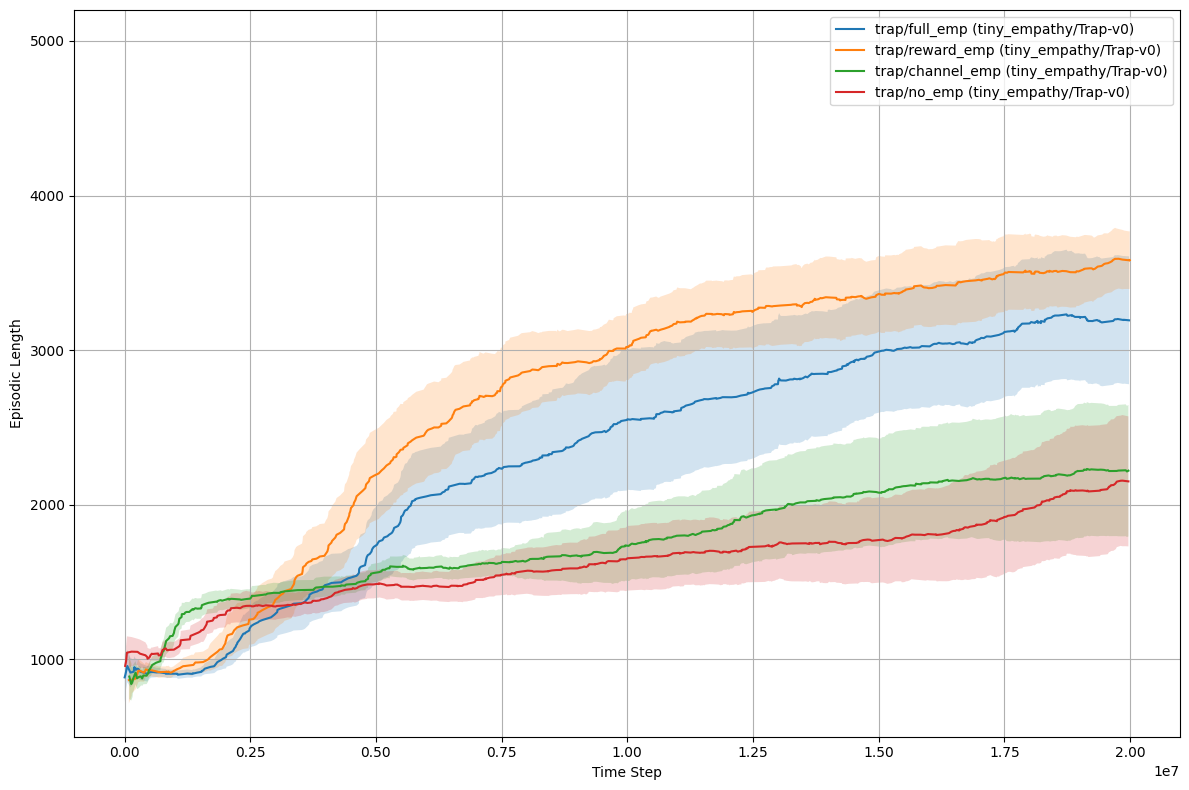

In [3]:
# Wandb APIの初期化
api = wandb.Api()
entity = "ugo-nama-kun"       # 例: "ugo-nama-kun"
project = "empathy_hrl"     # ワークスペース内のプロジェクト名

env_id = "tiny_empathy/Trap-v0"
# 複数の group, env_id の組み合わせ
targets = [
    {"wandb_group_name": "trap/full_emp"},
    {"wandb_group_name": "trap/reward_emp"},
    {"wandb_group_name": "trap/channel_emp"},
    {"wandb_group_name": "trap/no_emp"},
]

# ---------------------------
# 補助関数
# ---------------------------
def get_runs_for_group_env(runs, group, env_id_):
    return [
        run for run in runs
        if run.config.get("wandb_group_name") == group and run.config.get("env_id") == env_id_
    ]

def compute_curve_with_ci(runs, key_x="global_step", key_y="test/episodic_length", smooth_window=100):
    data_plots = []
    key_smooth = "smoothed_length"
    x = None

    for run in runs:
        df = run.history(keys=[key_x, key_y], pandas=True)
        df["run_id"] = run.id
        print(run.id)

        if x is None:
            x = df["global_step"]

        df.dropna(subset=["global_step", "test/episodic_length"])
        df = df.sort_values("global_step")
        df[key_smooth] = df["test/episodic_length"].rolling(window=100, min_periods=1).mean()
        # Keep only relevant columns
        smoothed_df = df[["global_step", key_smooth]].copy()
        #all_data.append(smoothed_df)
        data_plots.append(smoothed_df[key_smooth].values)

    data_plots = np.array(data_plots).transpose()
    print(data_plots.shape)
    # plt.plot(x, np.mean(data_plots, axis=1), c=colors[i])

    data_average = np.mean(data_plots, axis=1)
    data_std = np.std(data_plots, axis=1, ddof=1)
    n =  data_plots.shape[1]
    print(n)

    # plt.plot(x, data_average, c=colors[i])
    ci = 1.96 * data_std / np.sqrt(n)
    
    return x, data_average, ci

# ---------------------------
# プロット処理
# ---------------------------
runs = api.runs(f"{entity}/{project}")

plt.figure(figsize=(12, 8))

for target in targets:
    group = target["wandb_group_name"]
    target_runs = get_runs_for_group_env(runs, group, env_id)
    
    if not target_runs:
        print(f"[!] No runs found for group: {group}, env_id: {env_id}")
        continue

    x, y, ci = compute_curve_with_ci(target_runs)
    x = x
    y = y
    ci = ci
    label = f"{group} ({env_id})"
    plt.plot(x, y, label=label)
    plt.fill_between(x, y - ci, y + ci, alpha=0.2)

plt.ylim([500, 5_200])
plt.xlabel("Time Step")
plt.ylabel("Episodic Length")
# plt.title("Learning Curves with 95% Confidence Interval")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("plots_alife2025/trap.pdf")
plt.show()

In [15]:
for run in runs:
    # hist_df = run.history(keys=None, pandas=True)
    # print(hist_df.columns.tolist())
    # print(run.history(keys=["global_step", "test/episodic_length"], pandas=True))
    print(run.config.get("wandb_group_name"), run.config.get("env_id"))
    

sharefood/full_emp tiny_empathy/FoodShare-v0
sharefood/channel_emp tiny_empathy/FoodShare-v0
sharefood/reward_emp tiny_empathy/FoodShare-v0
sharefood/no_emp tiny_empathy/FoodShare-v0
grid/reward_emp tiny_empathy/GridRooms-v0
grid/full_emp tiny_empathy/GridRooms-v0
grid/no_emp tiny_empathy/GridRooms-v0
grid/channel_emp tiny_empathy/GridRooms-v0
sharefood/channel_emp tiny_empathy/FoodShare-v0
sharefood/full_emp tiny_empathy/FoodShare-v0
sharefood/no_emp tiny_empathy/FoodShare-v0
sharefood/reward_emp tiny_empathy/FoodShare-v0
sharefood/channel_emp tiny_empathy/FoodShare-v0
sharefood/reward_emp tiny_empathy/FoodShare-v0
sharefood/no_emp tiny_empathy/FoodShare-v0
sharefood/full_emp tiny_empathy/FoodShare-v0
sharefood/no_emp tiny_empathy/FoodShare-v0
sharefood/full_emp tiny_empathy/FoodShare-v0
sharefood/reward_emp tiny_empathy/FoodShare-v0
sharefood/channel_emp tiny_empathy/FoodShare-v0
sharefood/channel_emp tiny_empathy/FoodShare-v0
sharefood/full_emp tiny_empathy/FoodShare-v0
sharefood/no

# Decoder Learning Experiments

### foodshare

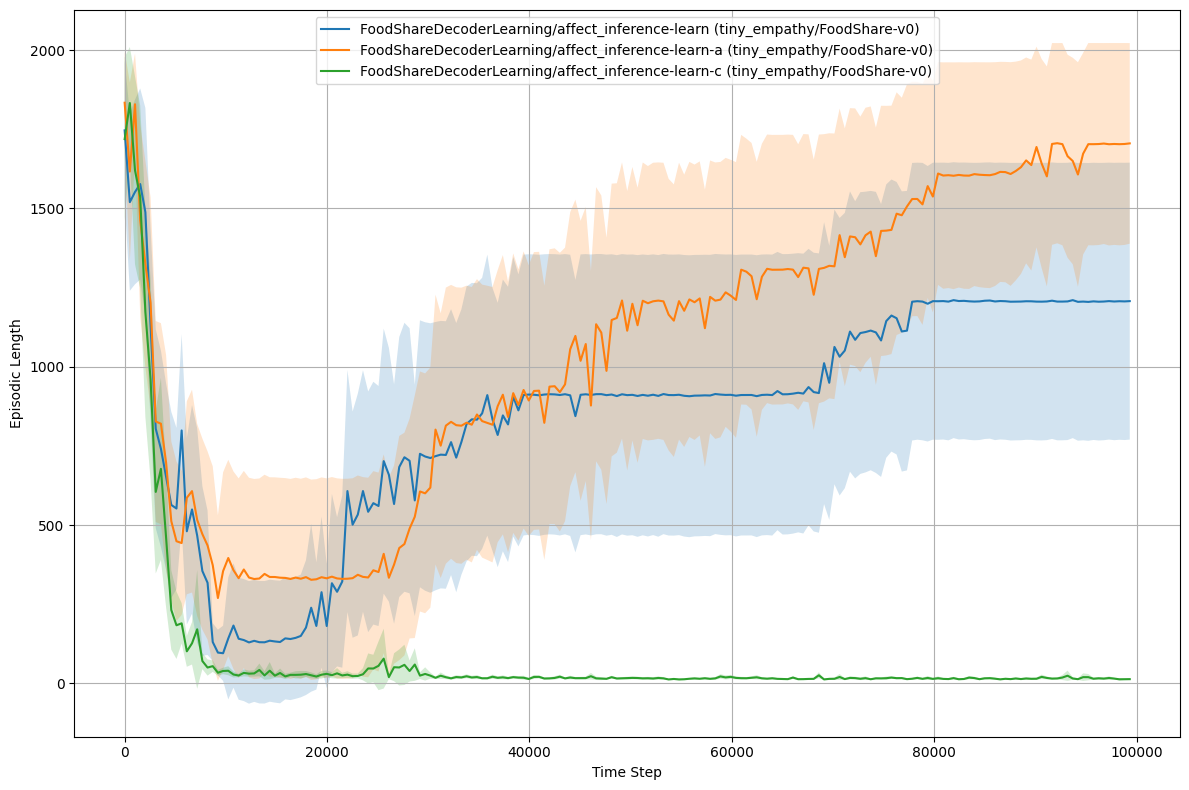

In [16]:
# Wandb APIの初期化
api = wandb.Api()
entity = "ugo-nama-kun"       # 例: "ugo-nama-kun"
project = "empathy_hrl"     # ワークスペース内のプロジェクト名

env_id = "tiny_empathy/FoodShare-v0" 
targets = [
    {"wandb_group_name": "FoodShareDecoderLearning/affect_inference-learn"},  # full empathy (raw expression)
    {"wandb_group_name": "FoodShareDecoderLearning/affect_inference-learn-a"},  # affective empathy (raw expression)
    {"wandb_group_name": "FoodShareDecoderLearning/affect_inference-learn-c"}, # cognitive empathy (raw expression)
    #{"wandb_group_name": "FoodShareDecoderLearning/full_inference-learn-c"}, # cognitive empathy {decode affect}
    #{"wandb_group_name": "FoodShareDecoderLearning/full_inference-learn"},  # full empathy {decode affect}
    #{"wandb_group_name": "FoodShareDecoderLearning/full_inference-no_learn"}, # full empathy {decode affect} no learning
    #{"wandb_group_name": "FoodShareDecoderLearning/affect_inference-no_learn"},  # full empathy (raw expression) no learning
]

# ---------------------------
# 補助関数
# ---------------------------
def get_runs_for_group_env(runs, group, env_id_):
    return [
        run for run in runs
        if run.config.get("wandb_group_name") == group and run.config.get("env_id") == env_id_
    ]

def compute_curve_with_ci(runs, key_x="global_step", key_y="test/episodic_length"):
    all_data = []
    for run in runs:
        df = run.history(keys=[key_x, key_y], pandas=True)
        df["run_id"] = run.id
        all_data.append(df)
    df_all = pd.concat(all_data, ignore_index=True)
    df_all = df_all.dropna(subset=[key_x, key_y])
    grouped = df_all.groupby(key_x)[key_y]
    mean = grouped.mean()
    ci = 1.96 * grouped.apply(sem)
    return mean.index, mean.values, ci.values

# ---------------------------
# プロット処理
# ---------------------------
runs = api.runs(f"{entity}/{project}")

plt.figure(figsize=(12, 8))

for target in targets:
    group = target["wandb_group_name"]
    print(group)
    target_runs = get_runs_for_group_env(runs, group, env_id)
    
    if not target_runs:
        print(f"[!] No runs found for group: {group}, env_id: {env_id}")
        continue

    x, y, ci = compute_curve_with_ci(target_runs)
    x = x
    label = f"{group} ({env_id})"
    plt.plot(x, y, label=label)
    plt.fill_between(x, y - ci, y + ci, alpha=0.2)

plt.xlabel("Time Step")
plt.ylabel("Episodic Length")
# plt.title("Learning Curves with 95% Confidence Interval")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("plots_alife2025/foodshare_decoder_v2.pdf")
plt.show()

### grid rooms

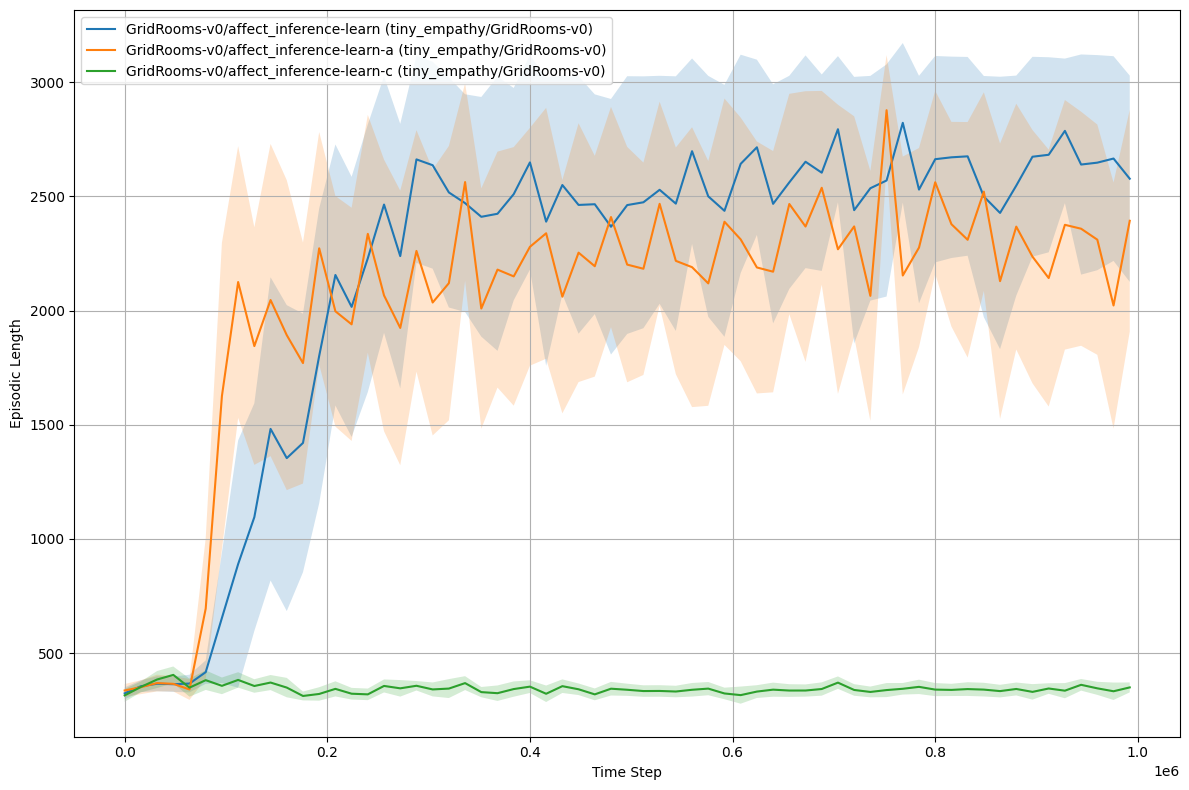

In [17]:
# Wandb APIの初期化
api = wandb.Api()
entity = "ugo-nama-kun"       # 例: "ugo-nama-kun"
project = "empathy_hrl"     # ワークスペース内のプロジェクト名

env_id = "tiny_empathy/GridRooms-v0"
targets = [
    {"wandb_group_name": "GridRooms-v0/affect_inference-learn"},  # full empathy (raw expression)
    {"wandb_group_name": "GridRooms-v0/affect_inference-learn-a"},  # affective empathy (raw expression)
    {"wandb_group_name": "GridRooms-v0/affect_inference-learn-c"}, # cognitive empathy (raw expression)
    # {"wandb_group_name": "GridRooms-v0/full_inference-learn"}, # full empathy (decode affect)
    # {"wandb_group_name": "GridRooms-v0/full_inference-no_learn"}, # full empathy (decode affect) no learning
    # {"wandb_group_name": "GridRooms-v0/affect_inference-no_learn"}, # full empathy (raw expression) no learning
]

# ---------------------------
# 補助関数
# ---------------------------
def get_runs_for_group_env(runs, group, env_id_):
    return [
        run for run in runs
        if run.config.get("wandb_group_name") == group and run.config.get("env_id") == env_id_
    ]

def compute_curve_with_ci(runs, key_x="global_step", key_y="test/episodic_length"):
    all_data = []
    for run in runs:
        df = run.history(keys=[key_x, key_y], pandas=True)
        df["run_id"] = run.id
        all_data.append(df)
    df_all = pd.concat(all_data, ignore_index=True)
    df_all = df_all.dropna(subset=[key_x, key_y])
    grouped = df_all.groupby(key_x)[key_y]
    mean = grouped.mean()
    ci = 1.96 * grouped.apply(sem)
    return mean.index, mean.values, ci.values

# ---------------------------
# プロット処理
# ---------------------------
runs = api.runs(f"{entity}/{project}")

plt.figure(figsize=(12, 8))

for target in targets:
    group = target["wandb_group_name"]
    print(group)
    target_runs = get_runs_for_group_env(runs, group, env_id)
    
    if not target_runs:
        print(f"[!] No runs found for group: {group}, env_id: {env_id}")
        continue

    x, y, ci = compute_curve_with_ci(target_runs)
    x = x[::10]
    y = y[::10]
    ci = ci[::10]
    label = f"{group} ({env_id})"
    plt.plot(x, y, label=label)
    plt.fill_between(x, y - ci, y + ci, alpha=0.2)

plt.xlabel("Time Step")
plt.ylabel("Episodic Length")
# plt.title("Learning Curves with 95% Confidence Interval")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("plots_alife2025/grid_rooms_decoder_v2.pdf")
plt.show()

# Ablation comparison (table)

### foodshare

In [19]:
# Wandb APIの初期化
api = wandb.Api()
entity = "ugo-nama-kun"       # 例: "ugo-nama-kun"
project = "empathy_hrl"     # ワークスペース内のプロジェクト名

env_id = "tiny_empathy/FoodShare-v0"
targets = [
    {"wandb_group_name": "FoodShareDecoderLearning/full_inference-learn-c"}, # cognitive empathy {decode affect}
    {"wandb_group_name": "FoodShareDecoderLearning/affect_inference-learn-c"}, # cognitive empathy (raw expression)
    {"wandb_group_name": "FoodShareDecoderLearning/full_inference-no_learn-c"}, # cognitive empathy (decode, no learning)
    {"wandb_group_name": "FoodShareDecoderLearning/affect_inference-no_learn-c"}, # cognitive empathy (raw, no learning)
    {"wandb_group_name": "FoodShareDecoderLearning/affect_inference-learn-a"},  # affective empathy
    {"wandb_group_name": "FoodShareDecoderLearning/affect_inference-no_learn-a"},  # affective empathy (no learning)
    {"wandb_group_name": "FoodShareDecoderLearning/full_inference-learn"},  # full empathy {decode affect}
    {"wandb_group_name": "FoodShareDecoderLearning/affect_inference-learn"},  # full empathy (raw expression)
    {"wandb_group_name": "FoodShareDecoderLearning/full_inference-no_learn"}, # full empathy {decode affect} no learning
    {"wandb_group_name": "FoodShareDecoderLearning/affect_inference-no_learn"},  # full empathy (raw expression) no learning
]

# ---------------------------
# 補助関数
# ---------------------------
def get_runs_for_group_env(runs, group, env_id_):
    return [
        run for run in runs
        if run.config.get("wandb_group_name") == group and run.config.get("env_id") == env_id_
    ]

def compute_curve_with_ci(runs, key_x="global_step", key_y="test/episodic_length"):
    all_data = []
    for run in runs:
        df = run.history(keys=[key_x, key_y], pandas=True)
        df["run_id"] = run.id
        all_data.append(df)
    df_all = pd.concat(all_data, ignore_index=True)
    df_all = df_all.dropna(subset=[key_x, key_y])
    grouped = df_all.groupby(key_x)[key_y]
    mean = grouped.mean()
    ci = 1.96 * grouped.apply(sem)
    return mean.values[-1], ci.values[-1]

# ---------------------------
# プロット処理
# ---------------------------
runs = api.runs(f"{entity}/{project}")

with open('plots_alife2025/foodshare_decoder_data.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['group', 'mean', 'ci'])
    
    for target in targets:
        group = target["wandb_group_name"]
        print(group)
        target_runs = get_runs_for_group_env(runs, group, env_id)
        
        if not target_runs:
            print(f"[!] No runs found for group: {group}, env_id: {env_id}")
            continue
    
        mean, ci = compute_curve_with_ci(target_runs)
        print(group.split("/")[-1], mean, ci)
        writer.writerow([group.split("/")[-1], mean, ci])
    

FoodShareDecoderLearning/full_inference-learn-c
full_inference-learn-c 213.3 267.9674652537623
FoodShareDecoderLearning/affect_inference-learn-c
affect_inference-learn-c 13.5 2.7295937619475827
FoodShareDecoderLearning/full_inference-no_learn-c
full_inference-no_learn-c 16.9 3.8704286720288694
FoodShareDecoderLearning/affect_inference-no_learn-c
affect_inference-no_learn-c 14.35 2.9869911282091213
FoodShareDecoderLearning/affect_inference-learn-a
affect_inference-learn-a 1705.15 316.6838701727306
FoodShareDecoderLearning/affect_inference-no_learn-a
affect_inference-no_learn-a 16.9 5.3674927205598655
FoodShareDecoderLearning/full_inference-learn
full_inference-learn 1802.85 267.30073200955155
FoodShareDecoderLearning/affect_inference-learn
affect_inference-learn 1207.1 437.2175969868406
FoodShareDecoderLearning/full_inference-no_learn
full_inference-no_learn 17.7 3.3742094278746086
FoodShareDecoderLearning/affect_inference-no_learn
affect_inference-no_learn 16.7 5.916165970413075


### grid

In [21]:
# Wandb APIの初期化
api = wandb.Api()
entity = "ugo-nama-kun"       # 例: "ugo-nama-kun"
project = "empathy_hrl"     # ワークスペース内のプロジェクト名

env_id = "tiny_empathy/GridRooms-v0"
targets = [
    {"wandb_group_name": "GridRooms-v0/full_inference-learn-c"}, # cognitive empathy {decode affect}
    {"wandb_group_name": "GridRooms-v0/affect_inference-learn-c"}, # cognitive empathy (raw expression)
    {"wandb_group_name": "GridRooms-v0/full_inference-no_learn-c"}, # cognitive empathy (decode, no learning)
    {"wandb_group_name": "GridRooms-v0/affect_inference-no_learn-c"}, # cognitive empathy (raw, no learning)
    {"wandb_group_name": "GridRooms-v0/affect_inference-learn-a"},  # affective empathy
    {"wandb_group_name": "GridRooms-v0/affect_inference-no_learn-a"},  # affective empathy (no learning)
    {"wandb_group_name": "GridRooms-v0/full_inference-learn"},  # full empathy {decode affect}
    {"wandb_group_name": "GridRooms-v0/affect_inference-learn"},  # full empathy (raw expression)
    {"wandb_group_name": "GridRooms-v0/full_inference-no_learn"}, # full empathy {decode affect} no learning
    {"wandb_group_name": "GridRooms-v0/affect_inference-no_learn"},  # full empathy (raw expression) no learning
]

# ---------------------------
# 補助関数
# ---------------------------
def get_runs_for_group_env(runs, group, env_id_):
    return [
        run for run in runs
        if run.config.get("wandb_group_name") == group and run.config.get("env_id") == env_id_
    ]

def compute_curve_with_ci(runs, key_x="global_step", key_y="test/episodic_length"):
    all_data = []
    for run in runs:
        df = run.history(keys=[key_x, key_y], pandas=True)
        df["run_id"] = run.id
        all_data.append(df)
    df_all = pd.concat(all_data, ignore_index=True)
    df_all = df_all.dropna(subset=[key_x, key_y])
    grouped = df_all.groupby(key_x)[key_y]
    mean = grouped.mean()
    ci = 1.96 * grouped.apply(sem)
    return mean.values[-1], ci.values[-1]

# ---------------------------
# プロット処理
# ---------------------------
runs = api.runs(f"{entity}/{project}")

with open('plots_alife2025/grid_decoder_data.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['group', 'mean', 'ci'])

    for target in targets:
        group = target["wandb_group_name"]
        print(group)
        target_runs = get_runs_for_group_env(runs, group, env_id)
        
        if not target_runs:
            print(f"[!] No runs found for group: {group}, env_id: {env_id}")
            continue
    
        mean, ci = compute_curve_with_ci(target_runs)
        print(group.split("/")[-1], mean, ci)
        writer.writerow([group.split("/")[-1], mean, ci])


GridRooms-v0/full_inference-learn-c
full_inference-learn-c 342.3076923076923 36.82130137717136
GridRooms-v0/affect_inference-learn-c
affect_inference-learn-c 356.0 29.617594770676433
GridRooms-v0/full_inference-no_learn-c
full_inference-no_learn-c 295.42857142857144 26.267820617630235
GridRooms-v0/affect_inference-no_learn-c
affect_inference-no_learn-c 368.0 31.827666726148326
GridRooms-v0/affect_inference-learn-a
affect_inference-learn-a 2147.133333333333 558.2352870983503
GridRooms-v0/affect_inference-no_learn-a
affect_inference-no_learn-a 1628.7272727272727 795.3618040482223
GridRooms-v0/full_inference-learn
full_inference-learn 2812.8571428571427 368.76000000000005
GridRooms-v0/affect_inference-learn
affect_inference-learn 2625.9285714285716 499.47121765076565
GridRooms-v0/full_inference-no_learn
full_inference-no_learn 1182.5 791.1922909241329
GridRooms-v0/affect_inference-no_learn
affect_inference-no_learn 1125.8 802.6180083546037
